# <center>Projet de Web Scraping et d'Analyse de données</center>

<h2>Présentation du projet</h2>

Ce projet consiste à l'extraction, au stockage des données et à la construction d'une base de données csv de l'ensemble des entreprises du CAC40 à la date du 8 avril 2020 depuis le site d'information financière <b>investing.com</b>. Notre travail consistera à la préparation des données, l'analyse ainsi que la visualisation des indicateurs financiers grâce à Python.

Nous aurons ainsi 40 observations et 10 variables dans notre fichier csv, dont :

<ul>1. action : nom de l'entreprise</ul>
<ul>2. prix : cours de l'action à la date du 8 avril 2020</ul>
<ul>3. cap_boursiere : Capitalisation boursière de l'entreprise</ul>
<ul>4. price_earning_ratio : Price Earning Ratio de l'action</ul>
<ul>5. beta : Bêta de l'action</ul>
<ul>6. benefice_par_action : Bénéfice par action</ul>
<ul>7. dividendes : Dividendes distribués</ul>
<ul>8. action_en_circulation : Nombre d'actions en circulation</ul>
<ul>9. secteur : Secteur d'activité de l'entreprise</ul>
<ul>10. effectif : Nombre d'employés</ul>

Ce rapport est accompagné de trois programmes python et d'un fichier csv :
<ul>01 collect.py : contenant le programme de collecte des données.</ul>
<ul>02 Exploitation.py : contenant le code d'exploitation de la structure du site internet.</ul>
<ul>03 Analayse.py : Contient le code de structuration et de conception de la base données.</ul>
<ul>mabase_CAC40.csv : la base de données contenant les données du CAC40.</ul>

<h2>1. Importation des librairies</h2>

In [1]:
# Importation des différentes librairies
import requests
import pdb
import time
import re
import pickle
import os
import html
import csv

import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline

import statsmodels.formula.api as sm

Nous avons lancer ce code et avons bien eu en sortie la page collectée dans le document pagescollectees que nous avons créer dans notre espace de travail. Nous allons ainsi passer à la prochaine étape, qui consiste à la collecte des quarante pages sources (pour l'ensemble des entreprises du CAC40)

<h3>2. Collecte des pages sources des 40 sociétés du CAC40</h3>

In [ ]:
# Extraction des pages de chaque action
for k in ['l.v.m.h.','accor','air-liquide','eads','arcelormittal-reg','atos-origin','axa','bnp-paribas','bouygues','cap-gemini','carrefour','credit-agricole','danone','dassault-system','gdf-suez','essilor-internat','hermes-international','kering','l-oreal','legrand','michelin','france-telecom','pernod-ricard','peugeot','publicis-groupe','renault','safran','saint-gobain','sanofi-aventis','schneider-electr','societe-generale','sodexho-alliance','stmicroelectroni','thales','total','veolia-environ','vinci','vivendi','uniball','worldline-sa']:
    url='https://fr.investing.com/equities/'+k
    request_headers={'User-Agent': "(Mozilla/5.0 (Windows; U; Windows NT 6.0;en-US; rv:1.9.2) Gecko/20100115 Firefox/3.6" }

    i=0
    while i<5:
        j=0
        while j<5:
            try:
                req=requests.get(url,headers=request_headers,timeout=10)
                j=1000
            except:
                time.sleep(1)
                j=j+1

        if j==1000:
            if req.status_code==200:
                content=req.text
                with open('pagescollectees/'+k+'.txt','w',encoding='utf8') as output:
                    output.write(content)

                i=1000
            else:
                i=i+1
                time.sleep(1)

    if i==1000:
        print("code source de la page",k,"est collecté")
    else:
        if j==1000:
            print("probléme au niveau de la collecte de la page ",k)
        else:
            print("problème au niveau du timeout",k)

pdb.set_trace()



code source de la page l.v.m.h. est collecté
code source de la page accor est collecté
code source de la page air-liquide est collecté
code source de la page eads est collecté
code source de la page arcelormittal-reg est collecté
code source de la page atos-origin est collecté
code source de la page axa est collecté
code source de la page bnp-paribas est collecté
code source de la page bouygues est collecté
code source de la page cap-gemini est collecté
code source de la page carrefour est collecté
code source de la page credit-agricole est collecté
code source de la page danone est collecté
code source de la page dassault-system est collecté
code source de la page gdf-suez est collecté
code source de la page essilor-internat est collecté
code source de la page hermes-international est collecté
code source de la page kering est collecté
code source de la page l-oreal est collecté
code source de la page legrand est collecté
code source de la page michelin est collecté
code source de la 

La commande req.status_code ne marche pas sur Jupiter. Cette commande permettait de vérifier et de s'assurer que les collectes de pages sources se sont bien passés. Si cela est bien fait on aura un résultat égal à 200. 
Nous allons à présent ouvrir chaque fichier pour comprendre la structure des données dans chaque page source.

<h3>3. Analyse des pages collectés</h3>

Après la collecte des pages sources et l'analyse intérractive de la dispositions des balises contenant chaque données dans l'IDLE Python grâce à notre fichier <b>02 Exploitation.py</b>, nous allons passer à la constitution de notre base de données.
C'est grâce aux expressions regulières que nous allons procéder à cette extraction de données.

Notre base sera dans un fichier csv stocker sous le nom de base_cac40.

In [3]:
L=os.listdir('pagescollectees')
Base=[['action','prix','cap_boursiere','price_earning_ratio','beta','benefice_par_action','dividendes','action_en_circulation','secteur','effectif']]
for k in L:
        with open('pagescollectees/'+k,'r',encoding='utf8') as output:
                    content = output.read()

        content = html.unescape(content)

        pattern1 = '<h1 class="float_lang_base_1 relativeAttr"\n\tdir="ltr" itemprop="name">(.+?(?=\t</h1>))'
        action = re.findall(pattern1,content)

        pattern2 = 'Clôture précédente</span><span class="float_lang_base_2 bold">(.+?(?=</span></div>))'
        prix = re.findall(pattern2,content)

        pattern3 = 'Cap. boursière</span><span class="float_lang_base_2 bold">(.+?(?=B</span></div>))'
        cap_boursiere = re.findall(pattern3,content)

        pattern4 = 'PER</span><span class="float_lang_base_2 bold">(.+?(?=</span></div>))'
        price_earning_ratio = re.findall(pattern4,content)

        pattern5 = 'Bêta</span><span class="float_lang_base_2 bold">(.+?(?=</span></div>))'
        beta = re.findall(pattern5,content)

        pattern6 = 'BPA</span><span class="float_lang_base_2 bold">(.+?(?=</span></div>))'
        benefice_par_action = re.findall(pattern6,content)

        pattern7 = 'Dividende</span><span class="float_lang_base_2 bold">(.+?(?=</span></div>))'
        dividendes = re.findall(pattern7,content)

        pattern8 = 'Act. en circulation</span><span class="float_lang_base_2 bold">(.+?(?=</span></div>))'
        action_en_circulation = re.findall(pattern8,content)

        pattern9 = '<div>Secteur<a href="/stock-screener/?sp=country::22|sector::9|industry::a|equityType::a<eq_market_cap;1">(.+?(?=</a></div>))'
        secteur = re.findall(pattern9,content)
        
        pattern10 = '<div>Employés<p class="bold">(.+?(?=</p></div>))'
        effectif = re.findall(pattern10,content)

        action = action[0]
        prix = prix[0]
        cap_boursiere = cap_boursiere[0]
        price_earning_ratio = price_earning_ratio[0]
        beta = beta[0]
        benefice_par_action = benefice_par_action[0]
        dividendes = dividendes[0]
        action_en_circulation = action_en_circulation[0]
        secteur = secteur[0]
        effectif = effectif[0]

        Result = [action,prix,cap_boursiere,price_earning_ratio,beta,benefice_par_action,dividendes,action_en_circulation,secteur,effectif]
        Base.append(Result)

with open("mabase_CAC40.csv", "w",encoding='utf8') as outfile:
        data=csv.writer(outfile,delimiter=',',lineterminator='\n')
        for b in Base:
                data.writerow(b)

La constitution de notre base données à très bien réussi et nous pouvons voir le fichier csv générer suite à l'exécution de ce programme dans le fichier contenant nos codes. 

<h2>Importation et analyse de la base de données</h2>

In [8]:
# Après la constitution du csv avec python, je vais l'importer et faire l'analyse de données sous Jupyter
mabase = "C:\\Users\\X230\\Downloads\\Jupyter doc\\Projet Web Scraping\\mabase_CAC40.csv"
df = pd.read_csv(mabase, header=None, index_col=0, dtypes={"prix": np.float32, "cap_boursiere": np.float32, "price_earning_ratio": np.float32, "beta": np.float32, "benefice_par_action": np.float32, "dividendes": "category", "action_en_circulation": np.int16, "secteur": "category", "effectif": np.int16})

TypeError: parser_f() got an unexpected keyword argument 'dtypes'

In [ ]:
df.head() #visualisation des cinq premières lignes de notre dataset

Nous allons à présent passé à la prise de connaissance des types des différentes variables de notre base. 
Pour cela, nous allons utiliser la fonction df.dtypes de pandas

In [4]:
df.dtypes

action                   object
prix                     object
cap_boursiere            object
price_earning_ratio      object
beta                     object
benefice_par_action      object
dividendes               object
action_en_circulation    object
secteur                  object
effectif                  int64
dtype: object

Après l'importation de notre base de données, nous constatons que toutes nos variables sont enrégistrées sous le types string (chaîne de caractère) à l'exception de l'<b>effectif</b> qui a été reconnue comme une variable quantitative.

In [5]:
df.shape
df.describe()

,effectif
count,41.000000
mean,125931.365854
std,88750.822809
min,3625.000000
25%,73037.000000
50%,107776.000000
75%,171000.000000
max,470237.000000


la fonction describe vient de confirmer notre observation des résultats précédentes sur le types des variables. Nous allons donc procéder à la préparation des données avant de passer à la visualisation grâce à <b>Matplotlib</b>, à l'analyse de données à l'aide des packages <b>NumPy et Pandas</b> (même si pandas a déjà été utiliser dans l'importation de notre base de données grâce à sa DataFrame) puis nous allons terminer par un cas de regression linéaire avec <b>Statsmodels</b>. 

<h2>Préparation des données</h2>

Nous allons d'abord procéder à la conversion des séparateur de décimal virgule en point et les point par les espaces dans notre dataframe avant de poursuivre les autres traitements.

<h3>Conversion des virgules en points</h3>

Nous allons convertir les virgules points pour pour permetre la reconnaissance des valeurs en int.

In [6]:
df.head()

,action,prix,cap_boursiere,price_earning_ratio,beta,benefice_par_action,dividendes,action_en_circulation,secteur,effectif
0,Accor SA (ACCP),"27,53","7,57","18,43","1,06","1,49","1,05 (2,84%)",270.932.350,Hôtels et motels,196020
1,Air Liquide SA (AIRP),"120,05","55,21","25,38","0,79","4,73","2,70 (2,32%)",473.105.514,Fabrication de produits chimiques,67200
2,ArcelorMittal S.A. (MT),"9,54","9,44",NaN,"2,07","- 2,23","0,26 (1,87%)",1.012.079.421,Fer et acier,191000
3,Atos SE (ATOS),"61,2","6,57","15,97","0,92","3,83","1,4 (2,78%)",108.632.710,Services informatiques,99906
4,AXA SA (AXAF),"15,37","36,15","10,11","1,36","1,52","1,43 (9,68%)",2.386.592.828,Assurance (vie),99843


In [7]:
df["prix"] = [x.replace(",", ".") for x in df["prix"]]
df["cap_boursiere"] = [x.replace(",", ".") for x in df["cap_boursiere"]]
df["beta"] = [x.replace(",", ".") for x in df["beta"]]
df["action_en_circulation"] = [x.replace(".", "") for x in df["action_en_circulation"]]

In [8]:
# Conversion du type de données
df[["prix"]] = df[["prix"]].astype("float")
df[["cap_boursiere"]] = df[["cap_boursiere"]].astype("float")
df[["beta"]] = df[["beta"]].astype("float")

In [9]:
df.dtypes

action                    object
prix                     float64
cap_boursiere            float64
price_earning_ratio       object
beta                     float64
benefice_par_action       object
dividendes                object
action_en_circulation     object
secteur                   object
effectif                   int64
dtype: object

In [10]:
df
#df[["action_en_circulation"]] = df[["action_en_circulation"]].astype('int64')

,action,prix,cap_boursiere,price_earning_ratio,beta,benefice_par_action,dividendes,action_en_circulation,secteur,effectif
0,Accor SA (ACCP),27.53,7.57,"18,43",1.06,"1,49","1,05 (2,84%)",270932350,Hôtels et motels,196020
1,Air Liquide SA (AIRP),120.05,55.21,"25,38",0.79,"4,73","2,70 (2,32%)",473105514,Fabrication de produits chimiques,67200
2,ArcelorMittal S.A. (MT),9.54,9.44,NaN,2.07,"- 2,23","0,26 (1,87%)",1012079421,Fer et acier,191000
3,Atos SE (ATOS),61.20,6.57,"15,97",0.92,"3,83","1,4 (2,78%)",108632710,Services informatiques,99906
4,AXA SA (AXAF),15.37,36.15,"10,11",1.36,"1,52","1,43 (9,68%)",2386592828,Assurance (vie),99843
5,BNP Paribas SA (BNPP),26.75,33.06,"4,31",1.63,"6,21","3,10 (12,09%)",1248591040,Banques (money center),198816
6,Bouygues SA (BOUY),28.53,11.03,9,0.87,"3,17","1,70 (6,36%)",379828120,Services de construction,133197
7,Capgemini SE (CAPP),75.38,12.82,"15,06",1.10,5,"1,90 (2,73%)",169028781,Logiciels et programmation,219314
8,Carrefour SA (CARR),14.66,11.70,"550,11",0.69,"0,03","0,46 (3,14%)",797807965,Détaillants (épicerie),321383
9,Danone SA (DANO),58.40,36.73,"19,78",0.68,"2,95","2,10 (3,70%)",648871267,Transformation alimentaire,102449


In [11]:
df["action_en_circulation"]
# Nous n'arrivons pas à convertir cette variable en int, car très grande (entre 9 et 10 chiffres en caractère)

0      270932350
1      473105514
2     1012079421
3      108632710
4     2386592828
5     1248591040
6      379828120
7      169028781
8      797807965
9      648871267
10    2884253712
11     648871267
12     259461643
13     782310505
14     436779219
15    2650313631
16    2413131292
17     104207783
18     126279322
19     558117205
20     503652374
21     273682252
22     179002555
23     263825497
24     894884478
25     236956827
26     291022000
27     477028673
28     542087728
29    1253826630
30     551021671
31     845140139
32     146006321
33     887810197
34     212756640
35    2586406841
36     138378605
37     554756150
38     554745990
39    1170575000
40     182644703
Name: action_en_circulation, dtype: object

<h3>Identification et gestion de données manquantes</h3>

Cette étape de préparation de données va commencer par la recherche de données manquantes dans ma base de données.

In [12]:
donnees_manquantes = df.isnull()
donnees_manquantes

,action,prix,cap_boursiere,price_earning_ratio,beta,benefice_par_action,dividendes,action_en_circulation,secteur,effectif
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,True,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False


Cette méthode nous permet d'observer les données manquantes à travers le <b>True</b>

Nous constatons que cette méthode ne prend pas en compte les données manquantes qui ne se présente pas sous la forme NaN alors qu'il y a une modalité de notre base de données qui se présente sous la forme N/A(N/A), nous allons donc la convertir grâce à NumPy.

In [13]:
# remplacer "N/A(N/A)" par NaN
df.replace("N/A (N/A)", np.nan, inplace = True)

In [14]:
df.tail()

,action,prix,cap_boursiere,price_earning_ratio,beta,benefice_par_action,dividendes,action_en_circulation,secteur,effectif
36,WFD Unibail Rodamco NV (URW),58.88,8.16,"7,55",1.46,"7,79","10,80 (21,43%)",138378605,Opérations immobilières,3625
37,Veolia (VIE),18.77,10.24,"14,85",0.66,"1,26","0,50 (2,75%)",554756150,Services de gestion des déchets,178780
38,Vinci SA (SGEF),71.92,40.09,"12,37",0.83,"5,81","3,05 (4,34%)",554745990,Services de construction,222000
39,Vivendi SA (VIV),20.88,24.59,"16,1",0.73,"1,3","0,60 (2,99%)",1170575000,Industrie cinématographique,43900
40,Worldline SA (WLN),56.82,10.56,"52,82",0.95,"1,08",NaN,182644703,Services financiers aux consommateurs,11609


ça y est, la trasformation a été exécuté avec succès.

Nous allons à présent passé au comptage des données manquantes par variable.

In [15]:
for column in donnees_manquantes.columns.values.tolist():
    print(column)
    print (donnees_manquantes[column].value_counts())
    print("") 

action
False    41
Name: action, dtype: int64

prix
False    41
Name: prix, dtype: int64

cap_boursiere
False    41
Name: cap_boursiere, dtype: int64

price_earning_ratio
False    37
True      4
Name: price_earning_ratio, dtype: int64

beta
False    41
Name: beta, dtype: int64

benefice_par_action
False    40
True      1
Name: benefice_par_action, dtype: int64

dividendes
False    41
Name: dividendes, dtype: int64

action_en_circulation
False    41
Name: action_en_circulation, dtype: int64

secteur
False    41
Name: secteur, dtype: int64

effectif
False    41
Name: effectif, dtype: int64



Nous constatons qu'il y a trois variables qui contiennent des données manquantes dans notre base. Dont :
1. price_earning_ratio : 4 données manquantes
2. benefice_par_action : 1 donnée manquante
3. dividendes : 1 donnée manquante

Pour une grosse base de donnnées, on pouvait gérer ces données manquantes en les remplaçant par la moyenne (pour les variables quantitatives), la fréquence (pour les variables qualitatives) ou tout simplement les laissés comme ça. 

Nous allons procéder au remplacement par la moyenne dans le cadre du price_earning_ratio.

Nous avons voulu procédé au remplacement des données manquantes du PER par la moyenne sauf qu'on n'arrive pas à calculer la moyenne à cause des virgules qu'on ne parvient pas à convertir en int.

le code : <b>per_moy = df["price_earning_ratio"].astype("float").mean(axis=0)
          print("Moyenne de la variable PER (Price earning ratio):", per_moy)</b>

Allait nous permettre de réaliser cette conversion. Ceci étant rien n'est perdue, nous pouvons toujours poursuivre notre étude avec les autres données.

<h3> Conversion des unités de mesures</h3>

Sur le site, les données de la variables Capitalisation boursière étaient suivies d'un B pour désigner Billions en anglais ou Milliards d'euros. <b>Par exemple, si la capitalisation boursière était de 78,55 milliards d'euros, il était écrit : 78,55B.</b> Nous allons donc convertir les modalités de cette variable en le multipliant par le milliard.

In [16]:
df["cap_boursiere"] = 1000000000*df["cap_boursiere"]
df.head()

,action,prix,cap_boursiere,price_earning_ratio,beta,benefice_par_action,dividendes,action_en_circulation,secteur,effectif
0,Accor SA (ACCP),27.53,7.570000e+09,"18,43",1.06,"1,49","1,05 (2,84%)",270932350,Hôtels et motels,196020
1,Air Liquide SA (AIRP),120.05,5.521000e+10,"25,38",0.79,"4,73","2,70 (2,32%)",473105514,Fabrication de produits chimiques,67200
2,ArcelorMittal S.A. (MT),9.54,9.440000e+09,NaN,2.07,"- 2,23","0,26 (1,87%)",1012079421,Fer et acier,191000
3,Atos SE (ATOS),61.20,6.570000e+09,"15,97",0.92,"3,83","1,4 (2,78%)",108632710,Services informatiques,99906
4,AXA SA (AXAF),15.37,3.615000e+10,"10,11",1.36,"1,52","1,43 (9,68%)",2386592828,Assurance (vie),99843


Après la conversion, nous avons obtenu des montants extrêment élevé, ce qui complique la normalisation des données et il serait ainsi préférable de les laisser comme telle et seulement changé le nom de la variable en précisant qu'il s'agit de la capitalisation boursière exprimé en Mds d'euros.

In [17]:
df["cap_boursiere_mds€"] = df["cap_boursiere"]/1000000000

In [18]:
df.dtypes

action                    object
prix                     float64
cap_boursiere            float64
price_earning_ratio       object
beta                     float64
benefice_par_action       object
dividendes                object
action_en_circulation     object
secteur                   object
effectif                   int64
cap_boursiere_mds€       float64
dtype: object

In [19]:
df.drop(["cap_boursiere"], axis='columns', inplace=True) 

#Supprimer l'ancienne colonne

<h3>Analyse de données</h3>

In [20]:
df.describe()

,prix,beta,effectif,cap_boursiere_mds€
count,41.000000,41.000000,41.000000,41.000000
mean,86.100244,1.030976,125931.365854,34.353171
std,124.372219,0.389575,88750.822809,35.206260
min,6.700000,0.530000,3625.000000,5.280000
25%,20.550000,0.690000,73037.000000,11.700000
50%,58.400000,0.950000,107776.000000,22.660000
75%,81.980000,1.250000,171000.000000,40.090000
max,617.200000,2.070000,470237.000000,171.970000


Cette fonction nous donne les principales statistiques descriptives de nos variables quantitatives. Pour générer les statistiques sur l'ensemble des variable de notre base, il aurait fallu intégrer ('all'). Ce qui ne serait pas pertienent dans notre cas.

In [21]:
# Obtenir l'information sur les caractéristiques de nos variables

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   action                 41 non-null     object 
 1   prix                   41 non-null     float64
 2   price_earning_ratio    37 non-null     object 
 3   beta                   41 non-null     float64
 4   benefice_par_action    40 non-null     object 
 5   dividendes             40 non-null     object 
 6   action_en_circulation  41 non-null     object 
 7   secteur                41 non-null     object 
 8   effectif               41 non-null     int64  
 9   cap_boursiere_mds€     41 non-null     float64
dtypes: float64(3), int64(1), object(6)
memory usage: 3.3+ KB


In [22]:
# Dimension les dimensions de notre base de données, il s'agit de 41 lignes et 10 colonnes dans mabase_CAC40.
df.shape

(41, 10)

<h4>Statistiques descriptives sur les variables quantatives</h4>

In [23]:
#Statistiques sur une seule variable
df["prix"].describe()

count     41.000000
mean      86.100244
std      124.372219
min        6.700000
25%       20.550000
50%       58.400000
75%       81.980000
max      617.200000
Name: prix, dtype: float64

In [24]:
# Statistique unique d'une variable : écart type 
df["beta"].std()

0.38957544120522264

In [25]:
# Statistique unique d'une variable : total des Bêta
df["beta"].count()

41

In [26]:
#Corrélation entre deux variables
df[['prix','cap_boursiere_mds€']].corr()

,prix,cap_boursiere_mds€
prix,1.000000,0.561133
cap_boursiere_mds€,0.561133,1.000000


In [27]:
df.corr()
# Tabeau de correlation des variables quantitatives de la base

,prix,beta,effectif,cap_boursiere_mds€
prix,1.000000,-0.273198,-0.293121,0.561133
beta,-0.273198,1.000000,0.157007,-0.282755
effectif,-0.293121,0.157007,1.000000,-0.169641
cap_boursiere_mds€,0.561133,-0.282755,-0.169641,1.000000


<h4>Statistiques descriptives sur les variables qualitatives</h4>

In [28]:
df["secteur"].describe()

count                                          41
unique                                         33
top       Constructeurs automobiles et de camions
freq                                            2
Name: secteur, dtype: object

In [58]:
pd.crosstab(df.secteur, 'freq')

col_0,freq
secteur,
Activités pétrolières et gazières,1
Assurance (vie),1
Aérospatiale et défense,2
Banques (money center),1
Banques régionales,2
Biotechnologie et médicaments,1
Boissons (alcoolisées),1
Constructeurs automobiles et de camions,2
Construction - matériaux et équipements,1


<h3>Visualisation des données</h3>

<h4>Histogramme</h4>

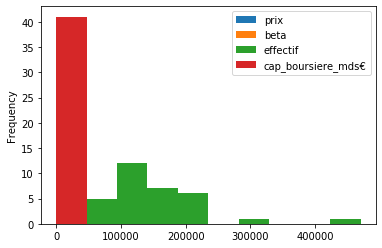

In [29]:
df.plot.hist()

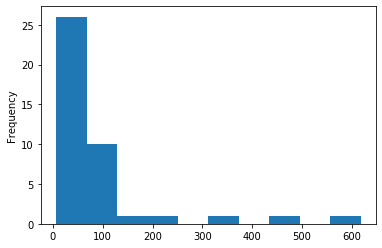

In [30]:
#Histogramme d'une seule variable
df.prix.plot.hist()

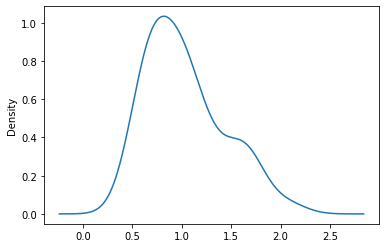

In [31]:
df.beta.plot(kind = "kde")

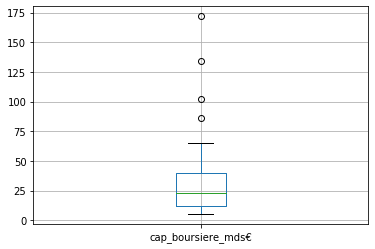

In [32]:
df.boxplot(column = "cap_boursiere_mds€")

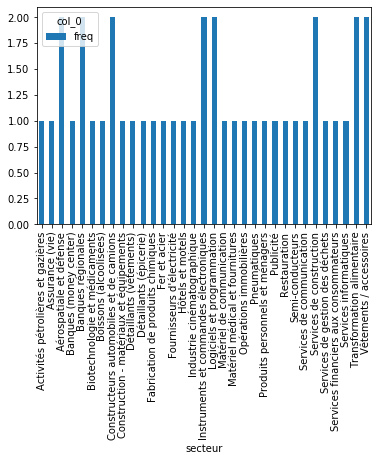

In [33]:
t = pd.crosstab(df.secteur, "freq")
t.plot.bar()

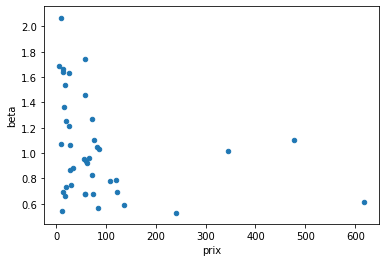

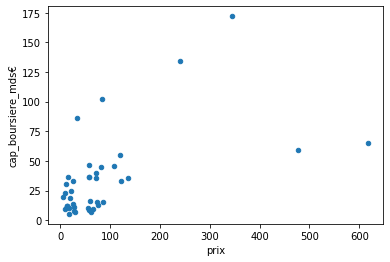

In [34]:
%matplotlib inline
# Nuage de point
df.plot.scatter("prix", "beta")
df.plot.scatter("prix", "cap_boursiere_mds€")
